In [66]:
%pip install konlpy
%pip install koeda

In [67]:
import pandas as pd
import random

from konlpy.tag import Okt
from koeda import AEasierDataAugmentation

import os

#### 1. 데이터셋 불러오기

In [68]:
!tar -zxvf data.tar.gz

data/
data/dev.csv
data/train.csv
data/.ipynb_checkpoints/
data/test.csv
data/sample_submission.csv


In [69]:
# 데이터 압축 파일(data.tar.gz)을 해당 노트북 파일과 동일한 경로에 위치할 때의 상대 경로
data_path = 'data/'

# train 데이터셋 불러오기
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))

# validation 데이터셋 불러오기
valid_df = pd.read_csv(os.path.join(data_path, 'dev.csv'))

In [70]:
display(train_df.head())
display(valid_df.head())

,fname,dialogue,summary,topic
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스


,fname,dialogue,summary,topic
0,dev_0,"#Person1#: 안녕하세요, 오늘 하루 어떠셨어요? \n#Person2#: 요즘...",#Person2#는 숨쉬기에 어려움을 겪는다. 의사는 #Person1#에게 이에 대...,의사에게 상담하기
1,dev_1,"#Person1#: 헤이, 지미. 나중에 운동하러 가자.\n#Person2#: 그래...",#Person1#은 지미에게 운동하러 가자고 제안하고 팔과 배를 운동하도록 설득한다.,운동하기
2,dev_2,#Person1#: 나는 더 이상 건강에 해로운 음식을 먹는 것을 멈춰야 해.\n#...,"#Person1#은 건강에 해로운 음식을 먹는 것을 멈추려는 계획을 세우고, #Pe...",건강한 음식
3,dev_3,"#Person1#: UFO를 믿으세요?\n#Person2#: 물론이죠, 그들은 저기...",#Person2#는 UFO를 믿고 꿈에서 그들을 볼 수 있다고 말한다. #Perso...,UFO와 외계인
4,dev_4,#Person1#: 오늘 학교에 갔어?\n#Person2#: 당연하지. 너는?\n#...,#Person1#은 오늘 학교에 가지 않았다. #Person2#는 내일 수업을 빼먹...,학교 가기


#### 데이터 증강하기 (AEDA)

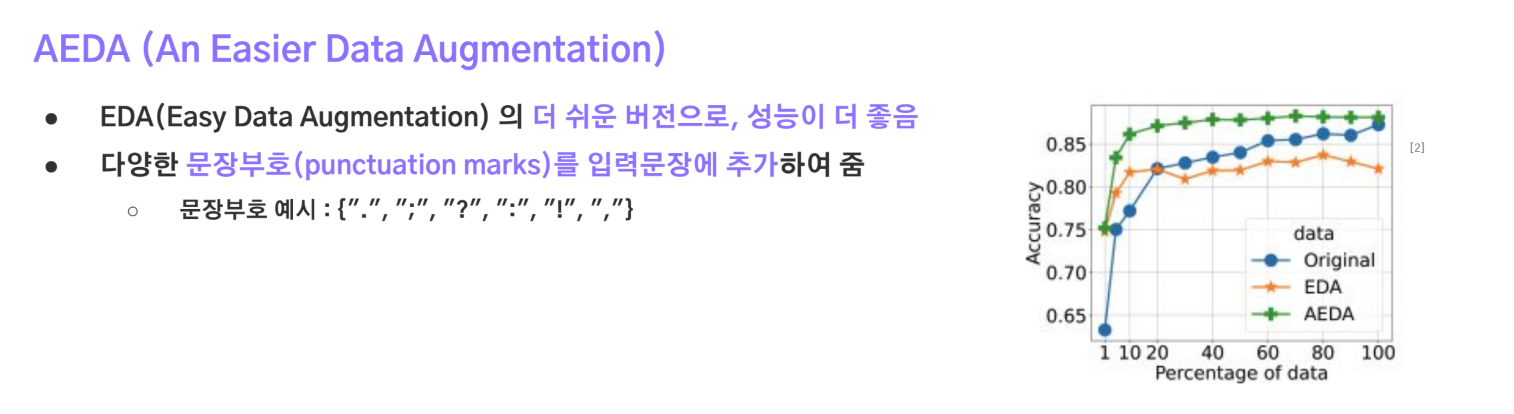

In [71]:
def augmentation(data):

    augmented_data = []
    aeda = AEasierDataAugmentation(morpheme_analyzer="Okt", punctuations=[".", ";", "?", ":", "!", ","])

    for dialogue in data:

        # '1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?\n',
        # '2#: 건강검진을 받는 것이 좋을 것 같아서요.\n',
        # ...
        sentences = dialogue.split('#Person')[1:]
        augmented_dialogue = ""

        for sentence in sentences:

            # tag: '1#'
            # text: '안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?\n'
            # ...
            tag, text = sentence.split(':', 1)
            flag = random.randint(0, 1)

            if flag:
                augmented_text = aeda(text, p=0.2, repetition=1)
            else:
                augmented_text = text

            augmented_dialogue += '#Person' + tag + ': ' + augmented_text

        augmented_data.append(augmented_dialogue)

    return augmented_data

In [72]:
example = train_df['dialogue'][0]
example

'#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?\n#Person2#: 건강검진을 받는 것이 좋을 것 같아서요.\n#Person1#: 그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.\n#Person2#: 알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?\n#Person1#: 심각한 질병을 피하는 가장 좋은 방법은 이를 조기에 발견하는 것입니다. 그러니 당신의 건강을 위해 최소한 매년 한 번은 오세요.\n#Person2#: 알겠습니다.\n#Person1#: 여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?\n#Person2#: 네.\n#Person1#: 당신도 알다시피, 담배는 폐암과 심장병의 주요 원인입니다. 정말로 끊으셔야 합니다. \n#Person2#: 수백 번 시도했지만, 습관을 버리는 것이 어렵습니다.\n#Person1#: 우리는 도움이 될 수 있는 수업과 약물들을 제공하고 있습니다. 나가기 전에 더 많은 정보를 드리겠습니다.\n#Person2#: 알겠습니다, 감사합니다, 의사선생님.'

In [73]:
ex_aug = augmentation([example])
ex_aug

['#Person1#:  안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?\n#Person2#:  건강검진을 받는 것이 좋을 것 같아서요.\n#Person1#:  그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.\n#Person2#:  알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?\n#Person1#: 심각한 질병을 피하는 가장 좋은 : 방법은 이를 조기에 ; 발견하는 것 : 입니다. 그러니 ! 당신 . 의 ! 건강을 ? 위해 최소한 매년 한 번은 오세요.#Person2#: : 알겠습니다.#Person1#:  여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?\n#Person2#:  네.\n#Person1#: 당신도 알다시피, 담배는 폐암과 심장병의 : 주요 원인입니다. 정말로 끊으셔야 합니다. ,#Person2#:  수백 번 시도했지만, 습관을 버리는 것이 어렵습니다.\n#Person1#: 우리는 도움이 될 수 있는 수업과 약물들을 제공하고 있습니다. 나가기 전 , 에 더 많은 정보를 드리겠습니다.#Person2#:  알겠습니다, 감사합니다, 의사선생님.']